## Initial Imports

In [1]:
import numpy as np
import pandas as pd
import ipdb
import pprint
import sys
import matplotlib.pyplot as plt
import math
import operator
from copy import deepcopy
# from tabulate import tabulate


eps = np.finfo(float).eps
from numpy import log2 as log

# Q1

## Part-1: PCA

## Reading Data

In [2]:
data = pd.read_csv("../input_data/data.csv")
labels = list(data.iloc[:,-1])
# data

In [3]:
data

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,25,193,441,0,0,0,0,0,0,...,255,1.00,0.00,0.07,0.04,0.00,0.04,0.00,0.00,normal
1,0,38,0,0,0,0,0,0,0,0,...,1,0.00,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
2,0,25,167,9724,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.06,0.00,0.00,0.00,0.00,normal
3,0,20,1339,0,0,0,0,0,0,0,...,31,0.23,0.04,0.23,0.00,0.02,0.00,0.00,0.00,normal
4,0,37,0,0,0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
5,0,25,326,2659,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
6,0,50,105,145,0,0,0,0,0,0,...,13,0.62,0.14,0.10,0.00,0.00,0.00,0.00,0.00,normal
7,0,40,0,0,0,0,0,0,0,0,...,16,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,20,0,133,0,0,0,0,0,0,...,2,0.50,1.00,0.50,1.00,0.00,0.00,1.00,1.00,probe
9,0,25,226,3630,0,0,0,0,0,0,...,255,1.00,0.00,0.14,0.01,0.00,0.00,0.00,0.00,normal


In [3]:
data_std = data.iloc[:, :-1]
data_std = (data_std - data_std.mean())/data_std.std()
data_std[["xAttack"]] = data[["xAttack"]]

In [4]:
# split data table into data X_std and class labels y
X_std = (data_std.iloc[:, :-1]).values

# Mean
mean_vec = np.array([(data_std.describe()).iloc[1]])

In [5]:
cov_mat = (((X_std - mean_vec).T) @ (X_std - mean_vec)) / (X_std.shape[0] - 1)
# cov_mat.shape

In [10]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00000000e+00,  1.02711722e-01,  8.43709066e-02,
         1.43491569e-02,  4.34550729e-03,  1.09911677e-02,
         9.46344650e-02,  9.34917981e-02,  8.77174387e-02,
         6.97197282e-02, -8.22978201e-02, -4.10362866e-02,
        -7.28234774e-02, -7.21941131e-02,  2.11963820e-01,
         2.10734138e-01,  7.63634611e-02, -1.30001345e-02,
        -4.16166554e-02,  5.62966164e-02, -1.13734931e-01,
        -1.20699846e-01,  2.65190010e-01,  2.43027897e-01,
        -2.59337516e-02, -6.68833004e-02, -6.66067298e-02,
         1.89977180e-01,  2.10900360e-01],
       [ 1.02711722e-01,  1.00000000e+00,  8.09433736e-03,
        -1.42492472e-02, -5.68020230e-02,  2.87942624e-02,
         3.69830687e-02,  3.46380084e-02,  4.10780015e-02,
         3.19376223e-02,  8.83717383e-02, -2.66170557e-01,
         2.73393137e-01,  2.70710187e-01,  1.47769346e-01,
         1.46229582e-01, -3.61666927e-01,  2.04617994e-01,
        -9.55568651e-02,  1.84236065e-01, -4.04493851e-01,
        -4.48

In [79]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# eig_vecs.shape
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [80]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Norm of all eigen vectors is 1')

Norm of all eigen vectors is 1


In [81]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0])

In [82]:
# tot = sum(eig_vals)
# var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

# trace1 = dict(
#     type='bar',
#     x=['PC %s' %i for i in range(1,5)],
#     y=var_exp,
#     name='Individual'
# )

# trace2 = dict(
#     type='scatter',
#     x=['PC %s' %i for i in range(1,5)], 
#     y=cum_var_exp,
#     name='Cumulative'
# )

# t = [trace1, trace2]

# layout=dict(
#     title='Explained variance by different principal components',
#     yaxis=dict(
#         title='Explained variance in percent'
#     ),
#     annotations=list([
#         dict(
#             x=1.16,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='Explained Variance',
#             showarrow=False,
#         )
#     ])
# )

In [124]:
errors = []
num_attributes_used = list(range(1, 30))
for num_features in num_attributes_used:
    # initializing matrix with a dummy column of 0's
    matrix_w = np.zeros(shape=(29,1))
    for i in range(num_features):
        matrix_w = np.hstack((matrix_w, eig_pairs[i][1].reshape(29,1)))

    # removing the first dummy columns
    matrix_w = matrix_w[:, 1:]
    reduced_X_std = X_std @ matrix_w
    reconstructed_X_std = ((reduced_X_std @ matrix_w.T))
    E = ((X_std - reconstructed_X_std) ** 2).mean() * 100
    errors.append(E)

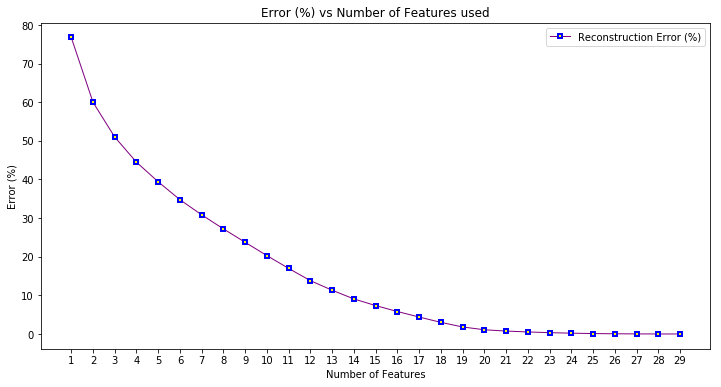

In [127]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(num_attributes_used, errors, color="purple", lw=1, ls='-', marker='s', markersize=4, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue", label='Reconstruction Error (%)');

plt.title("Error (%) vs Number of Features used")
plt.xticks(num_attributes_used)
plt.ylabel("Error (%)")
plt.xlabel("Number of Features")
plt.legend()
plt.show()

In [87]:

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot( attribute_list,error_list, color="Red", lw=1, ls='-');
    plt.xlabel("No. of Attributes ")
    plt.ylabel("Error Percentage")
    plt.show()

0.018136913484413177

## Part-2: K-means

In [88]:
def KMeans(data, k, max_iterations):
    n = data.shape[0]
    c = data.shape[1]
    
    std = np.std(data, axis = 0)
    mean = np.mean(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    centers_old = np.zeros(centers.shape)   # to store old centers
    centers_new = deepcopy(centers)         # Store new centers

    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    error = np.linalg.norm(centers_new - centers_old)
    
    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(data[:,0], data[:,1], s=7)
    ax.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)
    plt.show()

    # When, after an update, the estimate of that center stays the same, exit loop
    while max_iterations != 0 and error != 0:        
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)

        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)

        error = np.linalg.norm(centers_new - centers_old)
        max_iterations -= 1
        
#         fig, ax = plt.subplots(figsize=(16,8))
#         ax.scatter(data[:,0], data[:,1], s=7)
#         ax.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='r', s=150)
#         plt.show()

    print (max_iterations)
    fig, ax = plt.subplots(figsize=(14,7))
    colors = ['r', 'g', 'b', 'c', 'y']
    markers = ['+', '^', 'o', 'v', 's']
    for i in range(k):
        ax.scatter(data[clusters == i][:, 0], data[clusters == i][:, 1], s=7, marker=markers[i], c=colors[i])
        ax.scatter(centers_new[i,0], centers_new[i,1], marker='*', c='black', s=150)
    plt.show()

    return clusters, centers_new

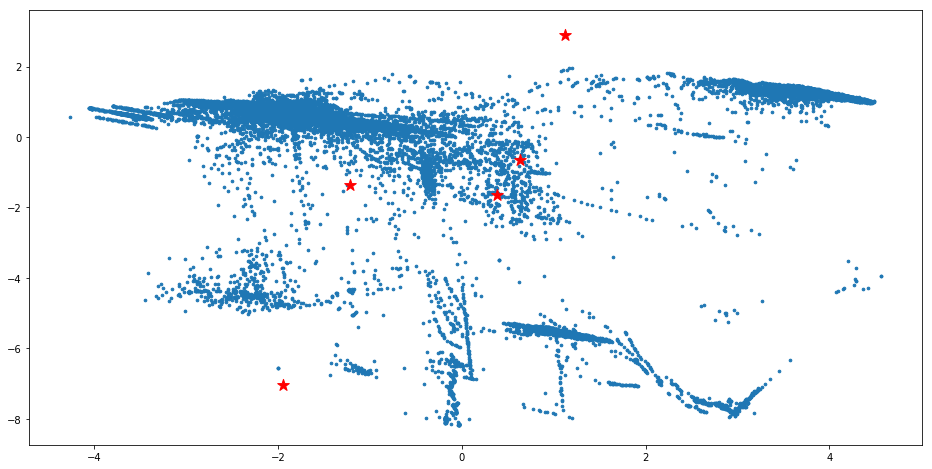

90


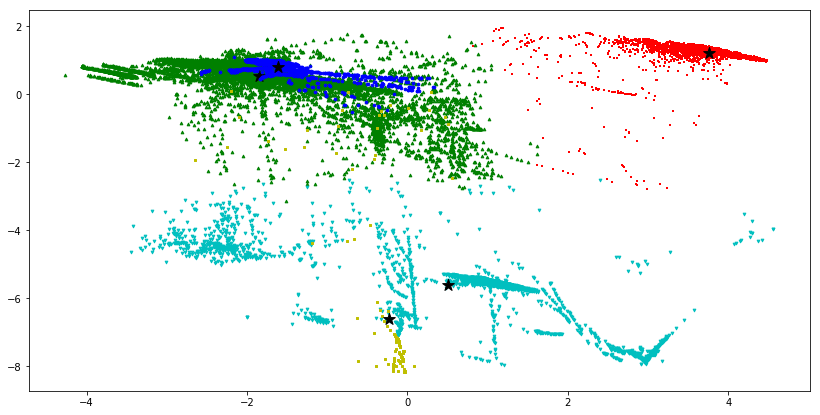

In [89]:
clusters, centers = KMeans(reduced_X_std, 5, 100)

In [90]:
cluster_series = pd.Series(clusters, name='Clusters')
label_series = pd.Series(labels, name='Classes')
df_confusion = pd.crosstab(label_series, cluster_series, margins=True)
df_confusion = df_confusion.iloc[:-1, :-1]
print(tabulate(df_confusion, headers='keys', tablefmt='psql'))

+-----------+------+-------+------+------+-----+
| Classes   |    0 |     1 |    2 |    3 |   4 |
|-----------+------+-------+------+------+-----|
| dos       | 6806 |   474 |  470 | 1364 |   0 |
| normal    |   35 | 11428 | 1332 |  541 |  28 |
| probe     |   77 |  1172 |    7 |  906 | 151 |
| r2l       |    0 |   185 |    0 |   10 |   2 |
| u2r       |    0 |    10 |    0 |    0 |   0 |
+-----------+------+-------+------+------+-----+


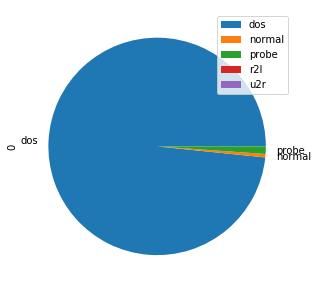

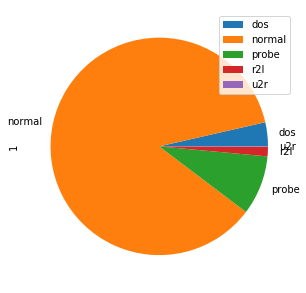

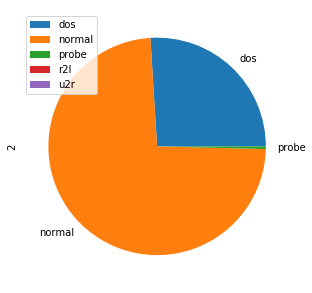

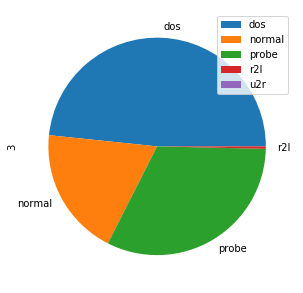

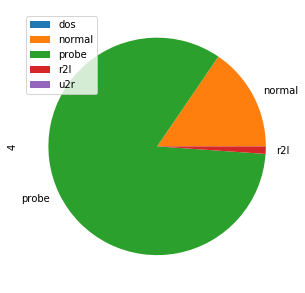

In [91]:
# Pie chart using Pandas

for i in range(0,5):
    plot = df_confusion.plot.pie(y= i, figsize=(5, 5))

# # Pie chart using Matplotlib
# for i in range(0,5):
#     labels = ['dos', 'normal', 'prob', 'r2l' , 'u2r']
#     values = df_confusion[i].tolist()
#     # only "explode" the 2nd slice (i.e. 'Hogs')
#     explode = (0, 0, 0, 0,0)
#     #add colors
#     colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9901']
#     fig1, ax1 = plt.subplots()
#     ax1.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#             shadow=True, startangle=90)
#     # Equal aspect ratio ensures that pie is drawn as a circle
#     ax1.axis('equal')
#     plt.tight_layout()
#     plt.show()

In [110]:
def calculate_purity(confusion_df):
    max_vals = np.array([confusion_df.max()])
    purity = max_vals.sum()/data.shape[0]
    print (purity)

In [93]:
calculate_purity(df_confusion)

0.8433074645971678


In [94]:
reduced_X_std.shape

(24998, 19)

## Part-3: GMM

### Imports

In [95]:
from sklearn.mixture import GaussianMixture
# data["xAttack"].unique()

In [96]:
gmm = GaussianMixture(n_components=5, random_state=3)
clf = gmm.fit(reduced_X_std)
clf.weights_

array([6.98213334e-01, 4.15913792e-02, 2.59635242e-01, 3.20025602e-04,
       2.40019202e-04])

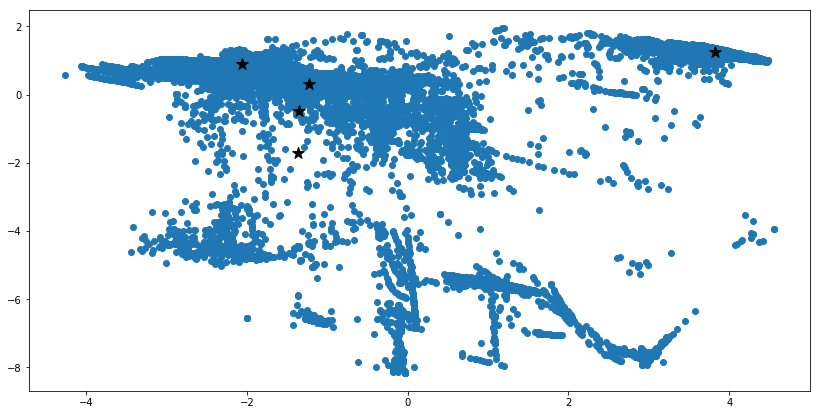

In [97]:
fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(reduced_X_std[:,0], reduced_X_std[:,1])
for i in range(5):
    ax.scatter(gmm.means_[i,0], gmm.means_[i,1], marker='*', c='black', s=150)
# ax.axis('equal')
plt.show()

In [98]:
pred_clusters = gmm.predict(reduced_X_std)
pred_clusters

array([0, 0, 0, ..., 1, 0, 2])

In [99]:
print(gmm.covariances_.shape)

(5, 19, 19)


In [104]:
cluster_series = pd.Series(pred_clusters, name='Clusters')
label_series = pd.Series(labels, name='Classes')
gmm_confusion_df = pd.crosstab(label_series, cluster_series, margins=True)
gmm_confusion_df = gmm_confusion_df.iloc[:-1, :-1]
print(tabulate(gmm_confusion_df, headers='keys', tablefmt='psql'))

+-----------+-------+-----+------+-----+-----+
| Classes   |     0 |   1 |    2 |   3 |   4 |
|-----------+-------+-----+------+-----+-----|
| dos       |  2433 | 191 | 6490 |   0 |   0 |
| normal    | 12605 | 749 |    0 |   8 |   2 |
| probe     |  2303 |  10 |    0 |   0 |   0 |
| r2l       |   108 |  85 |    0 |   0 |   4 |
| u2r       |     3 |   7 |    0 |   0 |   0 |
+-----------+-------+-----+------+-----+-----+


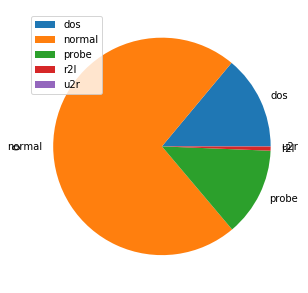

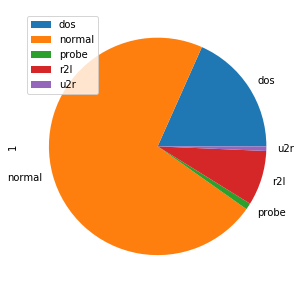

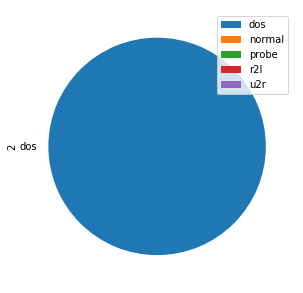

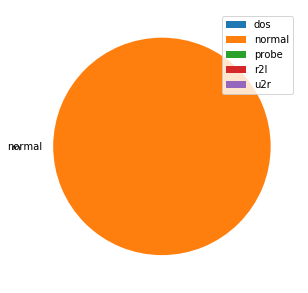

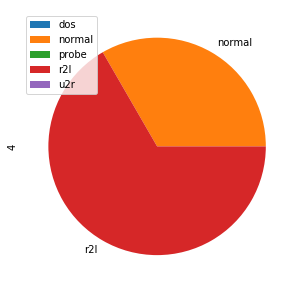

In [105]:
for i in range(0,5):
    plot = gmm_confusion_df.plot.pie(y= i, figsize=(5, 5))
    
# # Pie chart using Matplotlib
# for i in range(0,5):
#     labels = ['dos', 'normal', 'prob', 'r2l' , 'u2r']
#     values = gmm_confusion_df[i].tolist()
#     # only "explode" the 2nd slice (i.e. 'Hogs')
#     explode = (0, 0, 0, 0,0)
#     #add colors
#     colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9901']
#     fig1, ax1 = plt.subplots()
#     ax1.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#             shadow=True, startangle=90)
#     # Equal aspect ratio ensures that pie is drawn as a circle
#     ax1.axis('equal')
#     plt.tight_layout()
#     plt.show()

In [111]:
calculate_purity(gmm_confusion_df)

0.7943035442835427


## Part-4

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(reduced_X_std)

array([2, 0, 2, ..., 2, 1, 4])

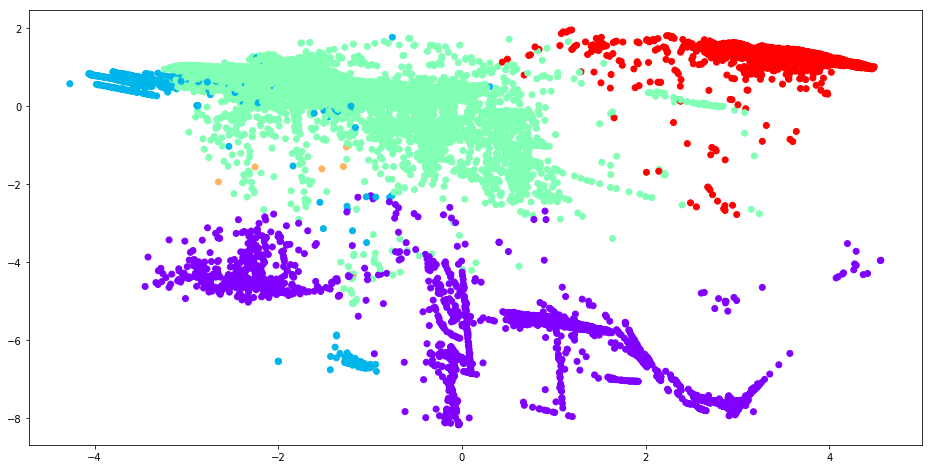

In [115]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(reduced_X_std[:,0], reduced_X_std[:,1], c=cluster.labels_, cmap='rainbow')

In [116]:
cluster_series = pd.Series(cluster.labels_, name='Clusters')
label_series = pd.Series(labels, name='Classes')
hc_confusion_df = pd.crosstab(label_series, cluster_series, margins=True)
hc_confusion_df = hc_confusion_df.iloc[:-1, :-1]
print(tabulate(hc_confusion_df, headers='keys', tablefmt='psql'))

+-----------+------+-----+-------+-----+------+
| Classes   |    0 |   1 |     2 |   3 |    4 |
|-----------+------+-----+-------+-----+------|
| dos       | 1364 |  14 |   931 |   0 | 6805 |
| normal    |  513 |  78 | 12746 |   8 |   19 |
| probe     |  997 | 812 |   475 |   0 |   29 |
| r2l       |    0 |   1 |   196 |   0 |    0 |
| u2r       |    0 |   0 |    10 |   0 |    0 |
+-----------+------+-----+-------+-----+------+


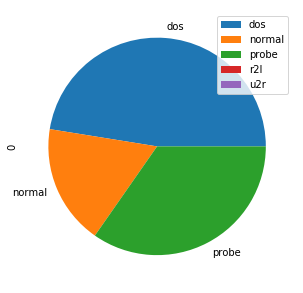

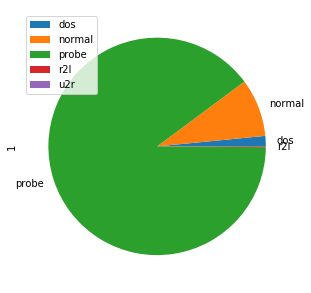

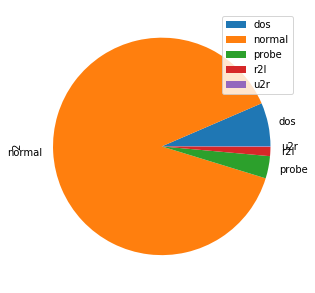

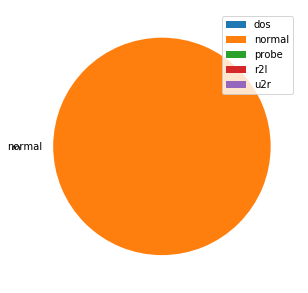

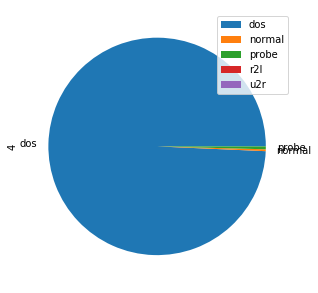

In [118]:
for i in range(0,5):
    plot = hc_confusion_df.plot.pie(y= i, figsize=(5, 5))

# # Pie chart using Matplotlib
# for i in range(0,5):
#     labels = ['dos', 'normal', 'prob', 'r2l' , 'u2r']
#     values = gmm_confusion_df[i].tolist()
#     # only "explode" the 2nd slice (i.e. 'Hogs')
#     explode = (0, 0, 0, 0,0)
#     #add colors
#     colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9901']
#     fig1, ax1 = plt.subplots()
#     ax1.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#             shadow=True, startangle=90)
#     # Equal aspect ratio ensures that pie is drawn as a circle
#     ax1.axis('equal')
#     plt.tight_layout()
#     plt.show()

In [119]:
calculate_purity(hc_confusion_df)

0.8694695575646052


## Part-5

### If you were to do dimensionality reduction on original data, could you use PCA?
* If our goal is solely dimension reduction, then PCA is the way to go, we generally regard PCA on mixtures of variables with less than enthusiasm. Doing regular PCA on the raw variables is not recommended. We should first create a distance matrix and then operate on that.
* In my opinion, PCA can be applied on mixed data-type by following way :-

* Make distance matrix using gower’s distance . In R it can be done by : - library(cluster); dist <- daisy(college.data,metric = "gower") Then we can use this distance matrix to reduce dimension.

* But I will recommend this method only if we have small data-set of less than 7000 rows. Let say if we have data-set of 100,000 rows , then it’s better to do one good encoding and then PCA or MULTIPLE CORRESPONDENCE ANALYSIS (MCA) rather than distance matrix because size of distance matrix will be (100,000 X 100,000), which will take forever for PCA to operate on.